## Importing the Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
Data = pd.read_csv(r"/Users/adityamahajan/Downloads/auto-mpg.csv")

In [3]:
Data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
Data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
Data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
Data = Data.drop('car name',axis=1)

In [7]:
Data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


## Replacing the origin value

In [8]:
Data['origin'] = Data['origin'].replace({1:'america',2:'europe',3:'asia'})

In [9]:
Data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86,2790,15.6,82,america
394,44.0,4,97.0,52,2130,24.6,82,europe
395,32.0,4,135.0,84,2295,11.6,82,america
396,28.0,4,120.0,79,2625,18.6,82,america
397,31.0,4,119.0,82,2720,19.4,82,america


## Changing object to float

In [10]:
Taf = pd.DataFrame(Data.horsepower.str.isdigit())

In [11]:
Data[Taf['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,america
126,21.0,6,200.0,?,2875,17.0,74,america
330,40.9,4,85.0,?,1835,17.3,80,europe
336,23.6,4,140.0,?,2905,14.3,80,america
354,34.5,4,100.0,?,2320,15.8,81,europe
374,23.0,4,151.0,?,3035,20.5,82,america


In [12]:
Data = Data.replace('?',np.nan)
Data[Taf['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,america
126,21.0,6,200.0,NaN,2875,17.0,74,america
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,america
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,america


In [13]:
Data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [14]:
Data.median()

/var/folders/vr/7lqb_5f97_d3hjwxz78t93240000gn/T/ipykernel_1202/2494236617.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Data.median()


mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
dtype: float64

In [15]:
Data['horsepower'] = Data['horsepower'].fillna(Data['horsepower'].median())

In [16]:
Data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [17]:
Data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [18]:
Data['horsepower']=Data['horsepower'].astype('float64')

In [19]:
Data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [20]:
Data = pd.get_dummies(Data,['origin'])

In [21]:
Data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [22]:
Data2 = Data.iloc[:,0:7]
Data2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


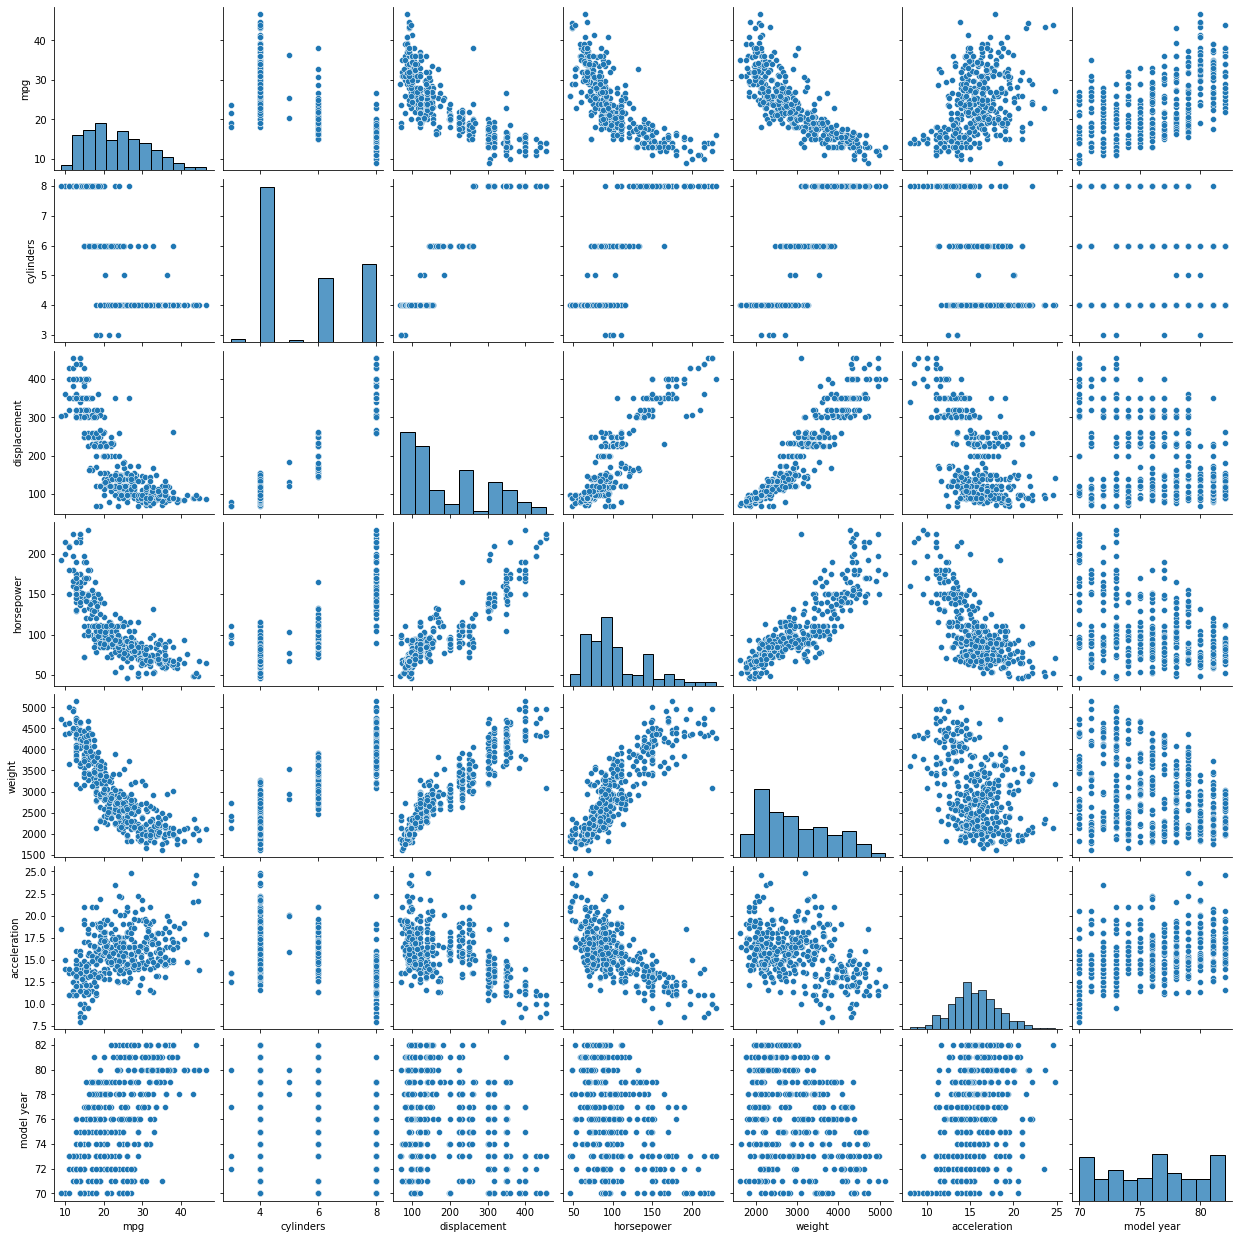

In [23]:
sns.pairplot(Data2)
plt.show()

In [24]:
y = Data['mpg']
x = Data.drop('mpg',axis=1)

## Spliting the data

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,train_size = 0.7,random_state = 22)

In [26]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
predx = model.predict(x_test)

In [28]:
y_test

164    21.0
188    16.0
303    31.8
343    39.1
236    25.5
       ... 
50     28.0
224    15.0
40     14.0
185    26.0
130    26.0
Name: mpg, Length: 120, dtype: float64

In [29]:
model.coef_

array([-0.87926067,  0.03421024, -0.01690457, -0.00708857,  0.01008392,
        0.75069371, -2.47656961,  1.60565635,  0.87091325])

In [30]:
model.intercept_

-11.68670094525612

In [31]:
model.score(x_test,y_test)

0.7868167344508075

In [32]:
from sklearn import metrics

In [34]:
MAE = metrics.mean_absolute_error(y_test,predx)

In [35]:
RMSE = np.sqrt(MAE)

In [38]:
MAE

2.9036120298523183

In [37]:
RMSE

1.7039988350501647